---

---

# Merger Tree

---

## I. Download Main Branch

1. `https://gemsimulation.com/` - [Data Access] - [Data] - [Download Branch]

2. Same as catalog

<details><summary>YTree (GalaxyMaker) Detailed</summary>

Advanced merger tree to connect GalaxyMaker catalogue.  

**Startegy**  
Calculate mutual shared fraction of particles in multiple snapshots  
Also, it considers mass change and velocity offset  

**Key columns**  
`id`: Same ID as GalaxyMaker  
`fat`: `tttiiiii`(ttt: timestep, iiiii: ID) of most probable progenitor  
`fat_score`: Combined matching score (0~4)  
`son`: `tttiiiii`(ttt: timestep, iiiii: ID) of most probable descendant  
`son_score`: Combined matching score (0~4)  
`first`: First leaf `tttiiiii` of the total tree  
`from`: First leaf `tttiiiii` of the branch  
`last`: Last leaf `tttiiiii` of the branch  
`final`: Last leaf `tttiiiii` of the total tree  

**Query processing**
1. Input values: IDs, Timestep
2. Return same `first` and `last` galaxies

</details>

<details><summary>PTree (HaloMaker) Detailed</summary>

Advanced merger tree to connect HaloMaker catalogue.  

**Startegy**  
Calculate mutual shared fraction of particles in multiple snapshots  

**Key columns**  
`id`: Unique ID through all snapshots (NOT identical to HaloMaker)  
`hmid`: ID in Halo/GalaxyMaker  
`fat`: `id` of most probable progenitor  
`score_fat`: (Nshared/Nparts_fat) * (Nshared/Nparts_this)  
`son`: `id` of most probable descendant  
`score_son`: (Nshared/Nparts_son) * (Nshared/Nparts_this)  
`desc`: [ shape(3,4) ]: (i,j) = At ith next snap, jth most probable descendant  
`npass`: Of `nparts` member particles, how many particles are in `desc`  
`first`: First leaf `id` of the branch  
`last`: Last leaf `id` of the branch  



**Query processing**
1. Input values: IDs, Timestep
2. Return same `last` galaxies

</details>

## ❓QUIZ 01❓
 > **1. Download a main branch of the most massive galaxy at 623th snapshot**  
 > **2. What is the size of downloaded zip file?**  

<details><summary>Answer</summary>

(ID=6)  
559K

</details>

---

## II. Read zip in python

In [1]:
# --------------------------------------------------------
# Load libraries
# --------------------------------------------------------
import numpy as np
import zipfile, os
import pickle
import matplotlib.pyplot as plt

# --------------------------------------------------------
# Unzip the file
# --------------------------------------------------------
'''
For HaloMaker
    (ytree_{Simulation}_{Snapshot}_{ID}.pkl) or (ptree_{Simulation}_{Snapshot}_{ID}.pkl)
'''
# Example:
# Target is ID=6 in 623th snapshot NC
zname = "./tree_example.zip" # <- Change this to the name of the zip file you want to extract
with zipfile.ZipFile(zname, 'r') as zip_ref:
    zip_ref.extractall()

# --------------------------------------------------------
# pickle to numpy
# --------------------------------------------------------
tname = "ytree_galaxy_623_6.pkl" # <- Change this to the name of the galaxy file you want to read
if not os.path.exists(tname): tname = "ptree_galaxy_623_6.pkl"

if(np.__version__ >= '1.16.3'):
    tree = np.load(tname, allow_pickle=True)
else:
    with open(tname, 'rb') as f:
        tree = pickle.load(f)
print(f"Tree length: {len(tree)}")
print(f" > Available:\n{tree.dtype.names}")

Tree length: 519
 > Available:
('nparts', 'timestep', 'level', 'host', 'hostsub', 'nbsub', 'nextsub', 'aexp', 'm', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'Lx', 'Ly', 'Lz', 'r', 'a', 'b', 'c', 'ek', 'ep', 'et', 'spin', 'sigma', 'sigma_bulge', 'm_bulge', 'rvir', 'mvir', 'tvir', 'cvel', 'rho0', 'rc', 'npass', 'hmid', 'id', 'desc', 'fat', 'son', 'score_fat', 'score_son', 'nprog', 'ndesc', 'first', 'last', 'first_rev', 'last_rev', 'umag', 'gmag', 'rmag', 'imag', 'zmag', 'r50', 'r50g', 'r50i', 'r50r', 'r50u', 'r50z', 'r90', 'r90g', 'r90i', 'r90r', 'r90u', 'r90z', 'age', 'ageg', 'agei', 'ager', 'ageu', 'agez', 'SFR', 'SFR_r50', 'SFR_r90', 'SFR10', 'SFR10_r50', 'SFR10_r90', 'vsig', 'vsig_r50', 'vsig_r90', 'SBu', 'SBu_r50', 'SBu_r90', 'SBg', 'SBg_r50', 'SBg_r90', 'SBr', 'SBr_r50', 'SBr_r90', 'SBi', 'SBi_r50', 'SBi_r90', 'SBz', 'SBz_r50', 'SBz_r90', 'metal', 'MBH', 'dBH', 'M_gas', 'M_gas_r50', 'M_gas_r90', 'Mcold_gas', 'Mcold_gas_r50', 'Mcold_gas_r90', 'Mdense_gas', 'Mdense_gas_r50', 'Mdense_gas_r90',

---

## III. Examples

### ex1) Mass Evolution

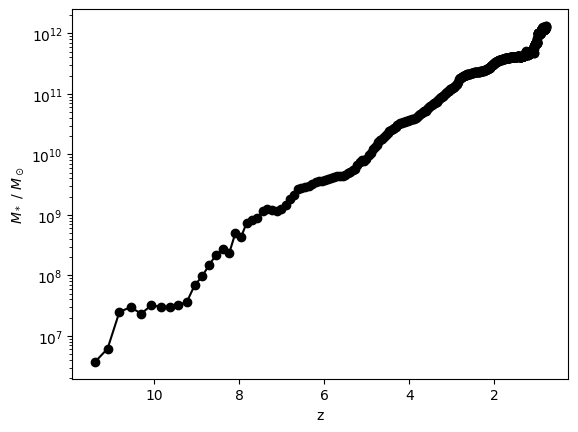

In [2]:
fig, ax = plt.subplots(dpi=100, )


ax.plot(1/tree['aexp']-1, tree['m'], marker='o', color='k')


ax.set_yscale('log')
ax.set_ylabel(r'$M_*$ / $M_\odot$')
ax.set_xlabel(r'z')
ax.invert_xaxis()

plt.show(); plt.close()

### ex2) Motion in Comoving Box

#### Load GalaxyMaker catalog

In [3]:
# --------------------------------------------------------
# Unzip the file
# --------------------------------------------------------
'''
For HaloMaker
    galaxy:   (GalaxyMaker_xxxxx.pkl, info_xxxxx.txt)
    halo:     (HaloMaker_xxxxx.pkl, info_xxxxx.txt)
'''
zname_HM = "./gm_example.zip" # <- Change this to the name of the zip file you want to extract
with zipfile.ZipFile(zname_HM, 'r') as zip_ref:
    zip_ref.extractall()


# --------------------------------------------------------
# ascii to numpy
# --------------------------------------------------------
# gname = "GalaxyMaker_00623.csv" # <- Change this to the name of the galaxy file you want to read
# with open(gname, 'r') as f:
#     header = f.readline()[2:-1]
#     header = header.split(',')
#     names = [h[:h.index("[")] for h in header]
#     units = [h[h.index("["):] for h in header]
# HMs = np.genfromtxt(gname, delimiter=',', names=names, case_sensitive=True, dtype=None)

# --------------------------------------------------------
# pickle to numpy
# --------------------------------------------------------
if(np.__version__ >= '1.16.3'):
    HMs = np.load("GalaxyMaker_00623.pkl", allow_pickle=True)
else:
    import pickle as pkl
    with open("GalaxyMaker_00623.pkl", 'rb') as f:
        HMs = pkl.load(f)

# --------------------------------------------------------
# Read the parameter file
# --------------------------------------------------------
pname = "info_00623.txt" # <- Change this to the name of the parameter file you want to read
with open(pname, "r") as f:
    HMparams = {key:float(val) if('.' in val) else int(val) for key, val in [line.split(':') for line in f]}

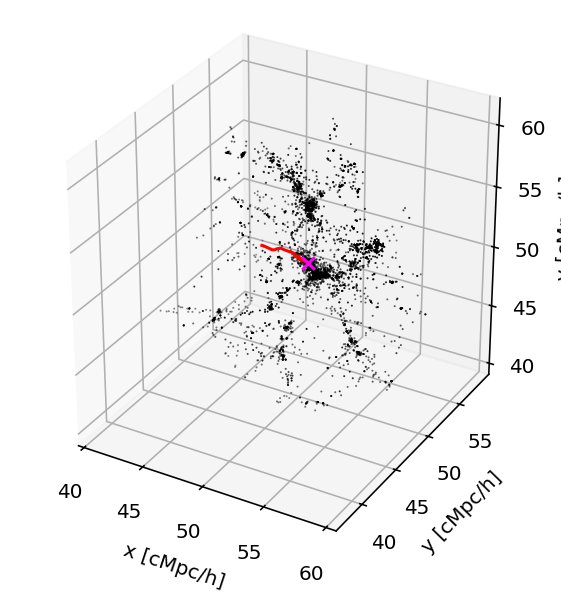

In [4]:
fig, ax = plt.subplots(dpi=144, subplot_kw=dict(projection='3d',computed_zorder=False))


# Galaxy distribution at 411th (Physical to Comoving)
cXs = HMs['X'] / HMs['aexp'] * HMparams['h'] / 1000 # [cMpc/h]
cYs = HMs['Y'] / HMs['aexp'] * HMparams['h'] / 1000 # [cMpc/h]
cZs = HMs['Z'] / HMs['aexp'] * HMparams['h'] / 1000 # [cMpc/h]
ax.scatter(cXs, cYs, cZs, s=1, ec='none', fc='k', zorder=0)

# Target's track (Physical to Comoving)
xs = tree['x'] / tree['aexp'] * HMparams['h'] / 1000 # [cMpc/h]
ys = tree['y'] / tree['aexp'] * HMparams['h'] / 1000 # [cMpc/h]
zs = tree['z'] / tree['aexp'] * HMparams['h'] / 1000 # [cMpc/h]
ax.plot(xs, ys, zs, c='r', zorder=1)
ax.scatter(xs[-1], ys[-1], zs[-1], s=40, fc='magenta', marker='x', zorder=3)

ax.set_xlabel('x [cMpc/h]')
ax.set_ylabel('y [cMpc/h]')
ax.set_zlabel('y [cMpc/h]')
ax.set_aspect('equal')

plt.show(); plt.close()

### ex3) MBH-Sigma Evolution

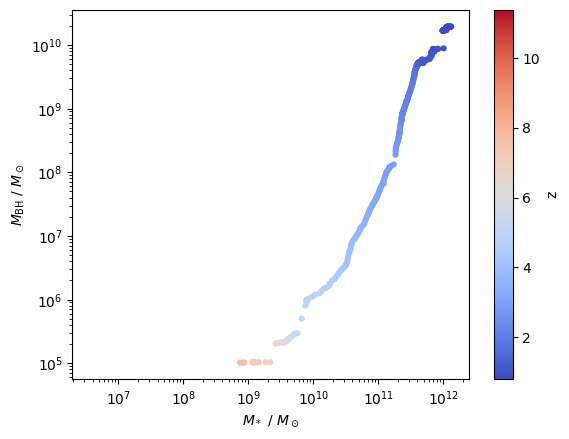

In [5]:
fig, ax = plt.subplots(dpi=100, )


sc = ax.scatter(tree['m'], tree['MBH'], c=1/tree['aexp']-1, cmap='coolwarm', s=20, ec='none')
colorbar = fig.colorbar(sc, label='z')


ax.set_yscale('log')
ax.set_ylabel(r'$M_{\rm BH}$ / $M_\odot$')
ax.set_xscale('log')
ax.set_xlabel(r'$M_*$ / $M_\odot$')

plt.show(); plt.close()

## ❓QUIZ 02❓
 > **1. Draw sSFR(=SFR/$M_*$) = $10^{-10}$ [$yr^{-11}$] line in the SFR-$M_*$ plane**  
 > **2. Overplot the evolutionary track of above branch**  
 > x-axis: $M_*$  
 > y-axis: Star formation rate (Timewindow: 10Myr) (Within R50)  
 > Colors: Redshift
 > Also draw  

C:\Users\syj35\AppData\Local\Temp\ipykernel_39760\2509611053.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


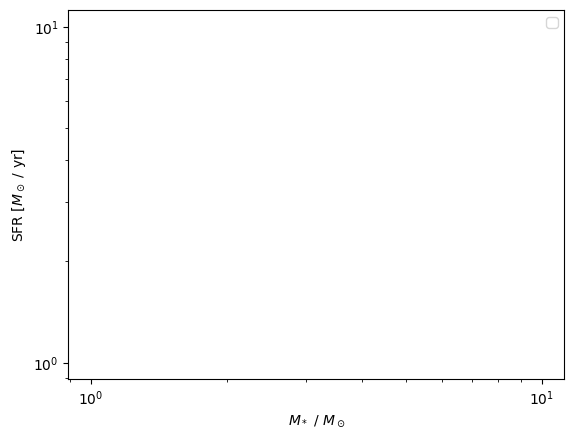

In [6]:
fig, ax = plt.subplots(dpi=100, )


# -------------------------
# HERE!



# -------------------------


ax.set_yscale('log')
ax.set_ylabel(r'SFR [$M_\odot$ / yr]')
ax.set_xscale('log')
ax.set_xlabel(r'$M_*$ / $M_\odot$')
ax.legend()

plt.show(); plt.close()

<details><summary>Answer</summary>

```python
fig, ax = plt.subplots(dpi=100, )


# -------------------------
# HERE!

# sSFR = SFR / M*
xs = np.linspace(1e7, 1e12, 10)
ys = xs / 1e10
ax.plot(xs, ys, color='k', zorder=-1, ls='--', lw=2, label=r'sSFR = $10^{-10}$ [yr$^{-1}$]')

# Target's track
ax.plot(tree['m'], tree['SFR10_r50'], color='grey', zorder=-1, lw=0.5)
sc = ax.scatter(tree['m'], tree['SFR10_r50'], c=1/tree['aexp']-1, cmap='coolwarm', s=20, ec='grey', lw=0.5)
colorbar = fig.colorbar(sc, label='z')
# -------------------------

ax.set_yscale('log')
ax.set_ylabel(r'SFR [$M_\odot$ / yr]')
ax.set_xscale('log')
ax.set_xlabel(r'$M_*$ / $M_\odot$')
ax.legend()

plt.show(); plt.close()
```
<img src="./images/track_SFMS.png" width="50%" height="50%">

</details>